# Comparison of linear and non-linear controllers 

This notebook is a pretty straightforward comparison of a linear controller against a non-linear controller.

Read through the code and run it as is! Then feel free to modify some of the parameters and play around with different trajectories.

In [1]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

import numpy as np 
import math
from math import sin, cos
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from drone import Drone2D
import trajectories
import simulate
import plotting
from controllers import LinearCascadingController, NonLinearCascadingController

pylab.rcParams['figure.figsize'] = 10, 10

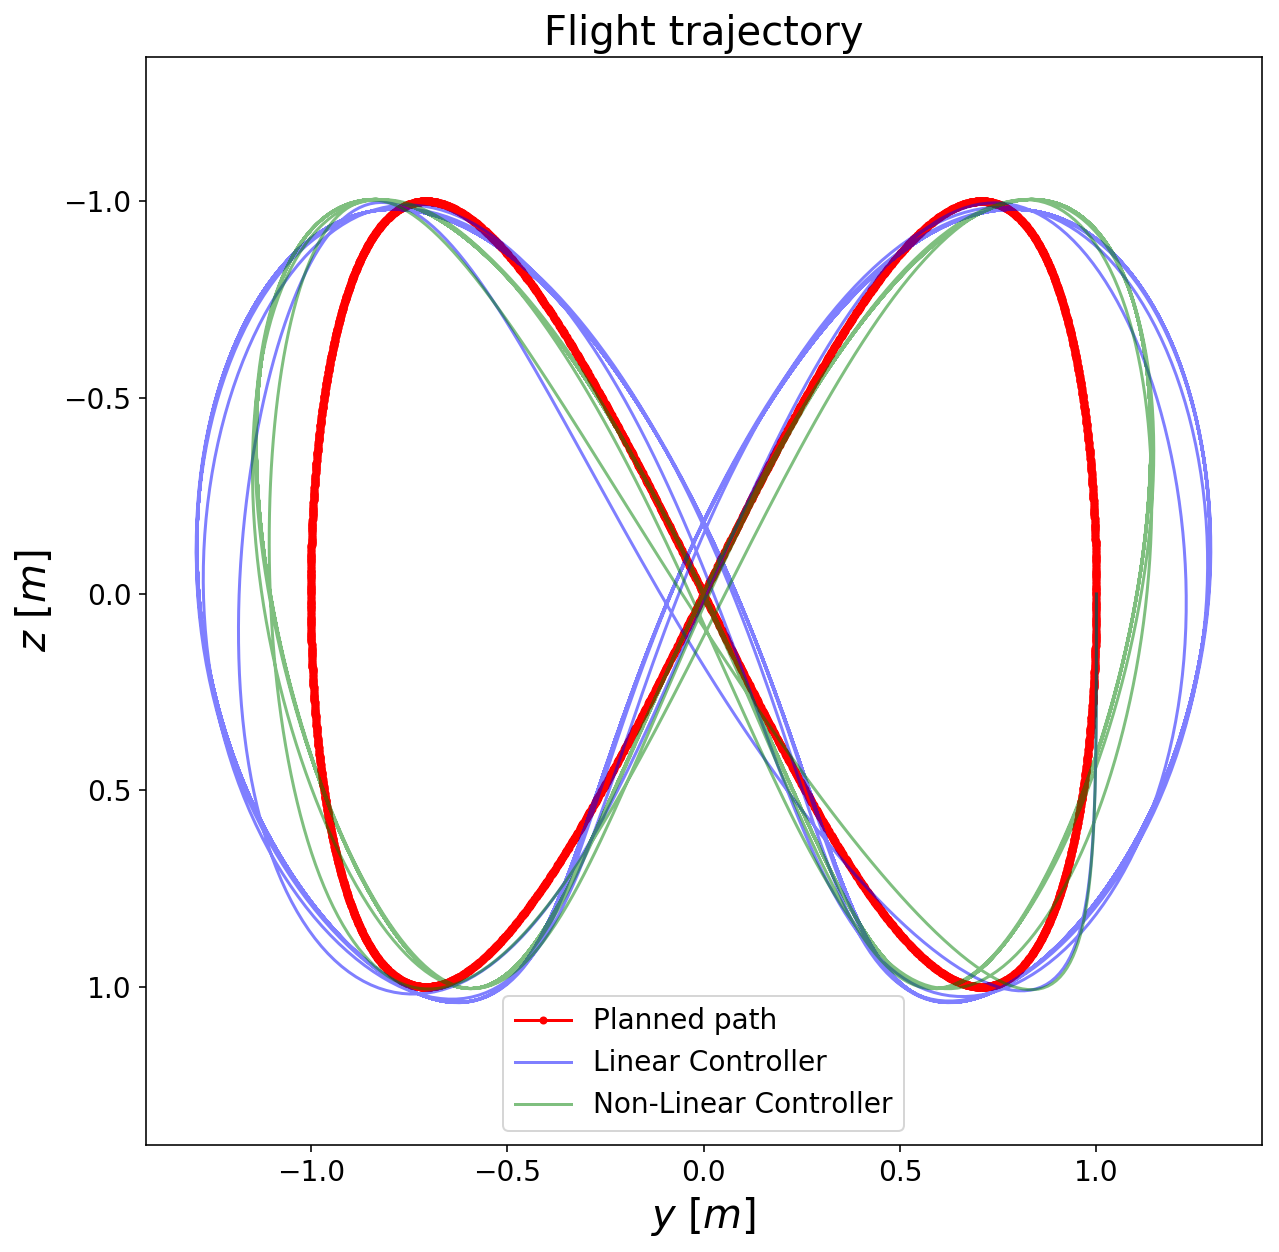

In [9]:
SPEED_UP = 5

total_time = 100.0
omega_z = 2.0

drone = Drone2D()

z_k_p   = 3.1   
z_k_d   = 10.0   
y_k_p   = 2.3
y_k_d   = 10.0
phi_k_p = 50.0
phi_k_d = 50.0


# INSTANTIATE CONTROLLERS
linear_controller = LinearCascadingController(
    drone.m,
    drone.I_x,
    z_k_p=z_k_p,   
    z_k_d=z_k_d,   
    y_k_p=y_k_p,
    y_k_d=y_k_d,
    phi_k_p=phi_k_p,
    phi_k_d=phi_k_d
)
non_linear_controller = NonLinearCascadingController(
    drone.m,
    drone.I_x,
    z_k_p=z_k_p,   
    z_k_d=z_k_d,   
    y_k_p=y_k_p,
    y_k_d=y_k_d,
    phi_k_p=phi_k_p,
    phi_k_d=phi_k_d
)

# GENERATE FIGURE 8
z_traj, y_traj, t = trajectories.figure_8(omega_z, total_time, dt=0.02)
dt = t[1] - t[0]

# SIMULATE MOTION
linear_history     = simulate.zy_flight(z_traj, 
                                        y_traj,
                                        t, 
                                        linear_controller,
                                        inner_loop_speed_up=SPEED_UP)
non_linear_history = simulate.zy_flight(z_traj, 
                                        y_traj, 
                                        t, 
                                        non_linear_controller,
                                        inner_loop_speed_up=SPEED_UP)

# PLOT RESULTS
pylab.rcParams['figure.figsize'] = 10, 10
plotting.compare_flight_paths(z_traj[0], y_traj[0], 
                              linear_history, non_linear_history, 
                              "Linear Controller", "Non-Linear Controller")

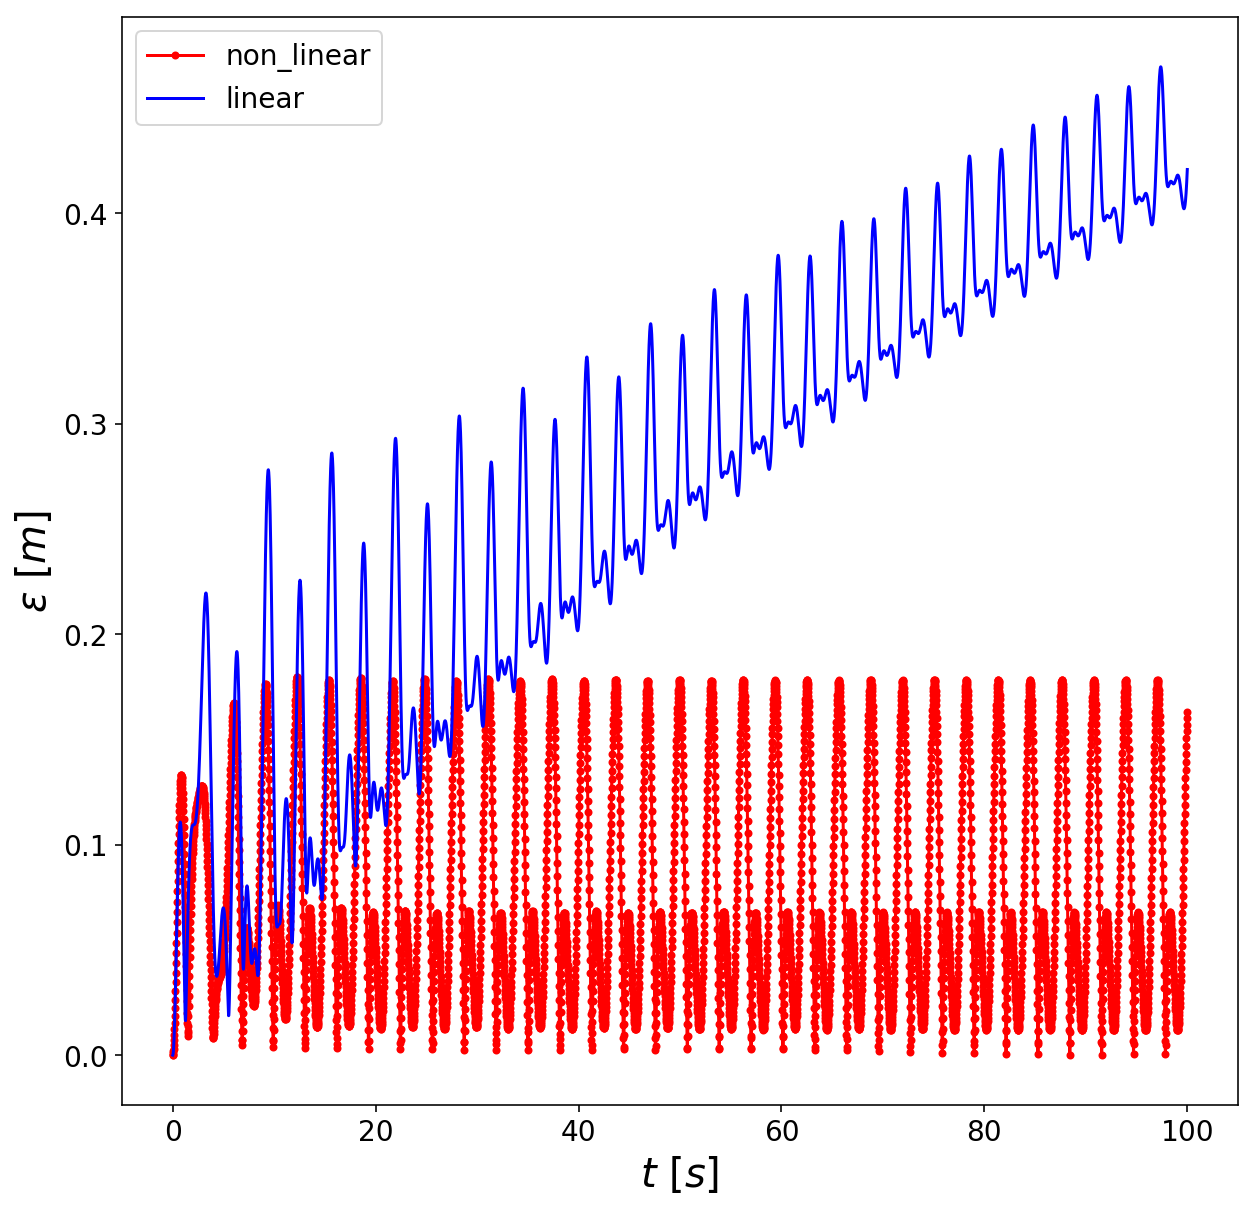

In [3]:
# Error calculation 

z_path = z_traj[0]
y_path = y_traj[0]

non_linear_Err= np.sqrt((non_linear_history[:,1] - y_path[:])**2 \
                        +(non_linear_history[:,0] - z_path[:])**2)
linear_Err= np.sqrt((linear_history[:,1] - y_path[:])**2 \
                    + (linear_history[:,0] - z_path[:])**2)
    
t1=np.linspace(0.0,total_time,int(total_time*SPEED_UP/dt))

plt.plot(t,non_linear_Err,color='red',marker='.')
plt.plot(t,linear_Err,color='blue')
plt.xlabel('$t$ [$s$]').set_fontsize(20)
plt.ylabel('$\epsilon$ [$m$]').set_fontsize(20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(['non_linear','linear'],fontsize = 14)
plt.show()